In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics


%matplotlib inline

In [2]:
# data
fashionBIG = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/SKP_fashionBIG.csv")
fashionBIG.head()

,age,income,months_subbed,upgrade
0,22,55.89,14,0
1,32,86.03,57,0
2,38,49.22,37,1
3,14,92.71,51,1
4,33,94.06,37,0


In [3]:
predictors = ["age", "income", "months_subbed"]

X_train, X_test, y_train, y_test = train_test_split(fashionBIG[predictors], fashionBIG["upgrade"], test_size=0.2)

zscore = StandardScaler()

zscore.fit(X_train)

Xz_test = zscore.transform(X_test)
Xz_train = zscore.transform(X_train)


In [4]:
lr = LogisticRegression() #create

In [5]:
lr.fit(Xz_train, y_train) #fit

LogisticRegression()

In [6]:
predictedVals = lr.predict(Xz_test) #predict

In [7]:
accuracy_score(y_test, predictedVals)

0.565

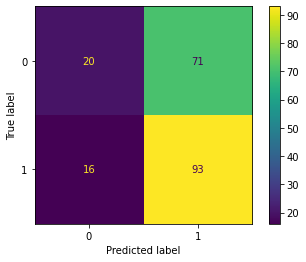

In [8]:
plot_confusion_matrix(lr, Xz_test, y_test)

## Predict new Data

In [10]:
fashionNEW = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/SKP_fashionNEW.csv")

Xnew = fashionNEW.iloc[:,0:3]
Xnewz = zscore.transform(Xnew)

In [11]:
Ypred = lr.predict(Xnewz)

In [13]:
accuracy_score(fashionNEW["upgrade"], Ypred)

0.596

In [14]:
confusion_matrix(fashionNEW["upgrade"], Ypred)

array([[ 90, 307],
       [ 97, 506]])

## LR with Cross Validation

In [16]:
# Kfold

X = fashionBIG[["age","income","months_subbed"]]
y = fashionBIG["upgrade"]

# create k-fold object
kf = KFold(n_splits = 5)

#create model
lr = LogisticRegression()

#create empty list to store accuracy for each fold
acc = []

In [17]:
# Use a for loop to loop through each fold and train a model, then add the accuracy to acc.

for train_indices, test_indices in kf.split(X):
    # Get your train/test for this fold
    X_train = X.iloc[train_indices]
    X_test  = X.iloc[test_indices]
    y_train = y[train_indices]
    y_test  = y[test_indices]
    
    # z score
    z = StandardScaler()
    X_train = z.fit_transform(X_train)
    X_test = z.transform(X_test)

    
    # model
    model = lr.fit(X_train,y_train)

    # record accuracy
    acc.append(accuracy_score(y_test, model.predict(X_test)))
    
#print overall acc
print(acc)
np.mean(acc)

[0.58, 0.605, 0.54, 0.565, 0.645]


0.587